# Generate and visualize experiment-level simulated data

The goal of this notebook is to create a simulated compendium, keep track of the relationship between samples and experiments.

Then visualizing the placement of the original experiment and the simulated experiment

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import glob
import pandas as pd
import numpy as np
import random
import umap

import warnings
warnings.filterwarnings(action='ignore')

from plotnine import (ggplot,
                      labs,  
                      geom_line, 
                      geom_point,
                      geom_errorbar,
                      aes, 
                      ggsave, 
                      theme_bw,
                      theme,
                      xlim,
                      ylim,
                      facet_wrap,
                      scale_color_manual,
                      guides, 
                      guide_legend,
                      element_blank,
                      element_text,
                      element_rect,
                      element_line,
                      coords)

sys.path.append("../")
from functions import generate_data

from numpy.random import seed
randomState = 123
seed(randomState)

Using TensorFlow backend.


In [2]:
# User parameters
NN_architecture = 'NN_2500_30'
dataset_name = "Pseudomonas_analysis"
analysis_name = 'Pa_experiment_lvl_sim'
num_simulated_experiments = 6000
lst_num_partitions = [1]
use_pca = True
num_PCs = 10

In [3]:
# Input files

# base dir on repo
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../")) 

local_dir = local_dir = os.path.abspath(os.path.join(os.getcwd(), "../../..")) 

NN_dir = base_dir + "/models/" + NN_architecture

normalized_data_file = os.path.join(
    base_dir,
    dataset_name,
    "data",
    "input",
    "train_set_normalized.pcl")

metadata_file = os.path.join(
    base_dir,
    dataset_name,
    "data",
    "metadata",
    "sample_annotations.tsv")

In [4]:
# Output
experiment_simulated_file = os.path.join(
    base_dir,
    "results",
    "simulated_experiment_compendia.png")

### Load file with experiment ids

In [5]:
experiment_ids_file = os.path.join(
    base_dir,
    dataset_name,
    "data",
    "metadata",
    "experiment_ids.txt")

### Generate simulated data with experiment ids

In [ ]:
# Generate simulated data
generate_data.simulate_compendium(experiment_ids_file, 
                                  num_simulated_experiments,
                                  normalized_data_file,
                                  NN_architecture,
                                  dataset_name,
                                  analysis_name
                                 )

### Load simulated gene expression data

In [6]:
# Simulated data file 
simulated_data_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "simulated",
    analysis_name,
    "simulated_data.txt.xz")
# Replace "simulated_data_labeled.txt.xz"

In [7]:
# Read in simulated data
simulated_data = pd.read_table(
    simulated_data_file,
    header=0,
    index_col=0,
    sep='\t')

simulated_data.head()

,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570,experiment_id
0,0.658,0.725,0.456,0.652,0.311,0.427,0.344,0.521,0.479,0.369,...,0.531,0.693,0.530,0.610,0.186,0.522,0.263,0.573,0.699,E-MEXP-2606_0
1,0.634,0.709,0.444,0.650,0.325,0.456,0.334,0.526,0.485,0.334,...,0.542,0.662,0.536,0.609,0.199,0.544,0.294,0.586,0.690,E-MEXP-2606_0
2,0.651,0.722,0.454,0.646,0.327,0.421,0.340,0.525,0.489,0.358,...,0.542,0.703,0.542,0.619,0.181,0.514,0.287,0.598,0.706,E-MEXP-2606_0
3,0.591,0.672,0.414,0.664,0.308,0.483,0.339,0.545,0.475,0.297,...,0.560,0.562,0.517,0.589,0.235,0.581,0.328,0.555,0.660,E-MEXP-2606_0
4,0.629,0.696,0.461,0.640,0.334,0.430,0.338,0.521,0.483,0.333,...,0.554,0.698,0.548,0.611,0.197,0.519,0.316,0.612,0.697,E-MEXP-2606_0


In [8]:
for name in list(simulated_data['experiment_id']):
    if "E-GEOD-51409" in name:
        print(name)

E-GEOD-51409_173
E-GEOD-51409_173
E-GEOD-51409_173
E-GEOD-51409_173
E-GEOD-51409_173
E-GEOD-51409_173
E-GEOD-51409_245
E-GEOD-51409_245
E-GEOD-51409_245
E-GEOD-51409_245
E-GEOD-51409_245
E-GEOD-51409_245
E-GEOD-51409_527
E-GEOD-51409_527
E-GEOD-51409_527
E-GEOD-51409_527
E-GEOD-51409_527
E-GEOD-51409_527
E-GEOD-51409_622
E-GEOD-51409_622
E-GEOD-51409_622
E-GEOD-51409_622
E-GEOD-51409_622
E-GEOD-51409_622
E-GEOD-51409_978
E-GEOD-51409_978
E-GEOD-51409_978
E-GEOD-51409_978
E-GEOD-51409_978
E-GEOD-51409_978
E-GEOD-51409_987
E-GEOD-51409_987
E-GEOD-51409_987
E-GEOD-51409_987
E-GEOD-51409_987
E-GEOD-51409_987
E-GEOD-51409_1250
E-GEOD-51409_1250
E-GEOD-51409_1250
E-GEOD-51409_1250
E-GEOD-51409_1250
E-GEOD-51409_1250
E-GEOD-51409_1261
E-GEOD-51409_1261
E-GEOD-51409_1261
E-GEOD-51409_1261
E-GEOD-51409_1261
E-GEOD-51409_1261
E-GEOD-51409_1568
E-GEOD-51409_1568
E-GEOD-51409_1568
E-GEOD-51409_1568
E-GEOD-51409_1568
E-GEOD-51409_1568
E-GEOD-51409_1641
E-GEOD-51409_1641
E-GEOD-51409_1641
E-GEOD-514

In [9]:
# Number of unique experiments in simulated dataset
ids = set([i.split("_")[0] for i in simulated_data['experiment_id']])
len(ids)     

107

In [10]:
"E-GEOD-51409" in ids

True

### Add experiment ids to original gene expression data

In [11]:
# Read original input
normalized_data = pd.read_table(
        normalized_data_file,
        header=0,
        sep='\t',
        index_col=0).T

normalized_data.head()

Gene_symbol,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5561,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570
05_PA14000-4-2_5-10-07_S2.CEL,0.853357,0.725280,0.640617,0.811465,0.694460,0.533958,0.158865,0.889579,0.884945,0.176558,...,0.466871,0.702785,0.790965,0.893249,0.789939,0.164157,0.970470,0.887472,0.900484,0.880012
54375-4-05.CEL,0.778790,0.767873,0.614859,0.907865,0.398800,0.460849,0.113876,0.761351,0.801740,0.222709,...,0.352020,0.694387,0.733186,0.639074,0.681204,0.110301,0.619554,0.747656,0.749893,0.805374
AKGlu_plus_nt_7-8-09_s1.CEL,0.789155,0.729508,0.725913,0.718989,0.530160,0.466327,0.079507,0.731643,0.827707,0.241847,...,0.392405,0.700352,0.773422,0.791118,0.931585,0.172570,0.797148,0.753785,0.856253,0.811099
anaerobic_NO3_1.CEL,0.716320,0.585079,0.390211,0.193248,0.279456,0.301781,0.513547,0.342051,0.415668,0.125914,...,0.398308,0.419574,0.593955,0.527203,0.706524,0.205510,0.504767,0.105662,0.363409,0.544780
anaerobic_NO3_2.CEL,0.658015,0.592172,0.410331,0.245504,0.312028,0.305852,0.513499,0.336723,0.334226,0.162965,...,0.407801,0.478697,0.571460,0.473054,0.669643,0.155548,0.562927,0.049738,0.388931,0.548814


In [12]:
# Read in metadata
metadata = pd.read_table(
    metadata_file,
    header=0,
    index_col=0,
    sep='\t')

In [13]:
# Reset index to be referenced based on sample id
metadata = metadata.reset_index().set_index('ml_data_source')
metadata.head()

,experiment,sample_name,description,nucleic_acid,medium,genotype,od,growth_setting_1,growth_setting_2,strain,temperature,treatment,additional_notes,variant_phenotype,abx_marker,biotic_int_lv_2,biotic_int_lv_1
ml_data_source,,,,,,,,,,,,,,,,,
GSM1141730_PA01_ZnO_PZO_.CEL,E-GEOD-46947,GSM1141730 1,Pseudomonas aeruginosa PAO1 LB aerated 5 h wi...,RNA,LB,NaN,NaN,planktonic,aerated,PAO1,37.0,1 mM ZnO nanoparticles,Grown for 5h,NaN,NaN,NaN,NaN
GSM1141729_PA01_none_PC_.CEL,E-GEOD-46947,GSM1141729 1,Pseudomonas aeruginosa PAO1 LB aerated 5 h,RNA,LB,NaN,NaN,planktonic,aerated,PAO1,37.0,NaN,Grown for 5h,NaN,NaN,NaN,NaN
GSM1608059_Planktonic_1.CEL,E-GEOD-65882,GSM1608059 1,PAO1 WT. Planktonic. Rep1,RNA,PBM plus 1 g / L glucose.,WT,0.26,Planktonic,Aerated,PAO1,37.0,NaN,Grown shaking at 200rpm,NaN,NaN,NaN,NaN
GSM1608060_Planktonic_2.CEL,E-GEOD-65882,GSM1608060 1,PAO1 WT. Planktonic. Rep2,RNA,PBM plus 1 g / L glucose.,WT,0.26,Planktonic,Aerated,PAO1,37.0,NaN,Grown shaking at 200rpm,NaN,NaN,NaN,NaN
GSM1608061_Planktonic_3.CEL,E-GEOD-65882,GSM1608061 1,PAO1 WT. Planktonic. Rep3,RNA,PBM plus 1 g / L glucose.,WT,0.26,Planktonic,Aerated,PAO1,37.0,NaN,Grown shaking at 200rpm,NaN,NaN,NaN,NaN


In [14]:
# Remove sample ids that have duplicates
metadata = metadata.loc[~normalized_data.index.duplicated(keep=False)]

In [15]:
# Add experiment id to original gene expression data
sample_ids = list(normalized_data.index)
normalized_data_label = normalized_data.copy()
for sample_id in sample_ids:
    if sample_id in list(metadata.index):
        if metadata.loc[sample_id].ndim == 1:
            normalized_data_label.loc[sample_id,'experiment_id'] = metadata.loc[sample_id,'experiment']
        else:
            normalized_data_label.loc[sample_id,'experiment_id'] = 'NA'
    else:
        normalized_data_label.loc[sample_id,'experiment_id'] = 'NA'

normalized_data_label.head()

Gene_symbol,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570,experiment_id
05_PA14000-4-2_5-10-07_S2.CEL,0.853357,0.725280,0.640617,0.811465,0.694460,0.533958,0.158865,0.889579,0.884945,0.176558,...,0.702785,0.790965,0.893249,0.789939,0.164157,0.970470,0.887472,0.900484,0.880012,E-MEXP-2593
54375-4-05.CEL,0.778790,0.767873,0.614859,0.907865,0.398800,0.460849,0.113876,0.761351,0.801740,0.222709,...,0.694387,0.733186,0.639074,0.681204,0.110301,0.619554,0.747656,0.749893,0.805374,NA
AKGlu_plus_nt_7-8-09_s1.CEL,0.789155,0.729508,0.725913,0.718989,0.530160,0.466327,0.079507,0.731643,0.827707,0.241847,...,0.700352,0.773422,0.791118,0.931585,0.172570,0.797148,0.753785,0.856253,0.811099,E-MEXP-2867
anaerobic_NO3_1.CEL,0.716320,0.585079,0.390211,0.193248,0.279456,0.301781,0.513547,0.342051,0.415668,0.125914,...,0.419574,0.593955,0.527203,0.706524,0.205510,0.504767,0.105662,0.363409,0.544780,NA
anaerobic_NO3_2.CEL,0.658015,0.592172,0.410331,0.245504,0.312028,0.305852,0.513499,0.336723,0.334226,0.162965,...,0.478697,0.571460,0.473054,0.669643,0.155548,0.562927,0.049738,0.388931,0.548814,NA


## Visualize data

In [16]:
# Select example experiments
example_id_sim = "E-GEOD-51409_173"
example_id = "E-GEOD-51409"
#example_id_sim = "E-GEOD-52445_58"
#example_id = "E-GEOD-52445"
#example_id_sim = "E-GEOD-18594_2"
#example_id = "E-GEOD-18594"
#example_id_sim = "E-MEXP-2606_0"
#example_id = "E-MEXP-2606"

In [17]:
# Only label selected example labels for simulated data
simulated_data.loc[simulated_data['experiment_id'] == example_id_sim,'experiment_id'] = example_id

print(example_id in list(simulated_data['experiment_id']))

simulated_data.loc[simulated_data['experiment_id'] != example_id,'experiment_id'] = "not selected"

simulated_data.head()

True


,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570,experiment_id
0,0.658,0.725,0.456,0.652,0.311,0.427,0.344,0.521,0.479,0.369,...,0.531,0.693,0.530,0.610,0.186,0.522,0.263,0.573,0.699,not selected
1,0.634,0.709,0.444,0.650,0.325,0.456,0.334,0.526,0.485,0.334,...,0.542,0.662,0.536,0.609,0.199,0.544,0.294,0.586,0.690,not selected
2,0.651,0.722,0.454,0.646,0.327,0.421,0.340,0.525,0.489,0.358,...,0.542,0.703,0.542,0.619,0.181,0.514,0.287,0.598,0.706,not selected
3,0.591,0.672,0.414,0.664,0.308,0.483,0.339,0.545,0.475,0.297,...,0.560,0.562,0.517,0.589,0.235,0.581,0.328,0.555,0.660,not selected
4,0.629,0.696,0.461,0.640,0.334,0.430,0.338,0.521,0.483,0.333,...,0.554,0.698,0.548,0.611,0.197,0.519,0.316,0.612,0.697,not selected


In [18]:
example_id in list(simulated_data['experiment_id'])

True

In [19]:
# Only label selected example labels for original data
normalized_data_label.loc[normalized_data_label['experiment_id'] == example_id,'experiment_id'] = example_id
normalized_data_label.loc[normalized_data_label['experiment_id'] != example_id,'experiment_id'] = "not selected"

normalized_data_label.head()

Gene_symbol,PA0001,PA0002,PA0003,PA0004,PA0005,PA0006,PA0007,PA0008,PA0009,PA0010,...,PA5562,PA5563,PA5564,PA5565,PA5566,PA5567,PA5568,PA5569,PA5570,experiment_id
05_PA14000-4-2_5-10-07_S2.CEL,0.853357,0.725280,0.640617,0.811465,0.694460,0.533958,0.158865,0.889579,0.884945,0.176558,...,0.702785,0.790965,0.893249,0.789939,0.164157,0.970470,0.887472,0.900484,0.880012,not selected
54375-4-05.CEL,0.778790,0.767873,0.614859,0.907865,0.398800,0.460849,0.113876,0.761351,0.801740,0.222709,...,0.694387,0.733186,0.639074,0.681204,0.110301,0.619554,0.747656,0.749893,0.805374,not selected
AKGlu_plus_nt_7-8-09_s1.CEL,0.789155,0.729508,0.725913,0.718989,0.530160,0.466327,0.079507,0.731643,0.827707,0.241847,...,0.700352,0.773422,0.791118,0.931585,0.172570,0.797148,0.753785,0.856253,0.811099,not selected
anaerobic_NO3_1.CEL,0.716320,0.585079,0.390211,0.193248,0.279456,0.301781,0.513547,0.342051,0.415668,0.125914,...,0.419574,0.593955,0.527203,0.706524,0.205510,0.504767,0.105662,0.363409,0.544780,not selected
anaerobic_NO3_2.CEL,0.658015,0.592172,0.410331,0.245504,0.312028,0.305852,0.513499,0.336723,0.334226,0.162965,...,0.478697,0.571460,0.473054,0.669643,0.155548,0.562927,0.049738,0.388931,0.548814,not selected


In [20]:
example_id in list(normalized_data_label['experiment_id'])

True

In [21]:
# UMAP embedding of original input data

# Get and save model
model = umap.UMAP(random_state=randomState).fit(normalized_data)

input_data_UMAPencoded = model.transform(normalized_data)
input_data_UMAPencoded_df = pd.DataFrame(data=input_data_UMAPencoded,
                                         index=normalized_data.index,
                                         columns=['1','2'])
# Add label
input_data_UMAPencoded_df['experiment_id'] = normalized_data_label['experiment_id']

In [22]:
# UMAP embedding of simulated data

# Drop label column
simulated_data_numeric = simulated_data.drop(['experiment_id'], axis=1)

simulated_data_UMAPencoded = model.transform(simulated_data_numeric)
simulated_data_UMAPencoded_df = pd.DataFrame(data=simulated_data_UMAPencoded,
                                         index=simulated_data.index,
                                         columns=['1','2'])

# Add back label column
simulated_data_UMAPencoded_df['experiment_id'] = simulated_data['experiment_id']

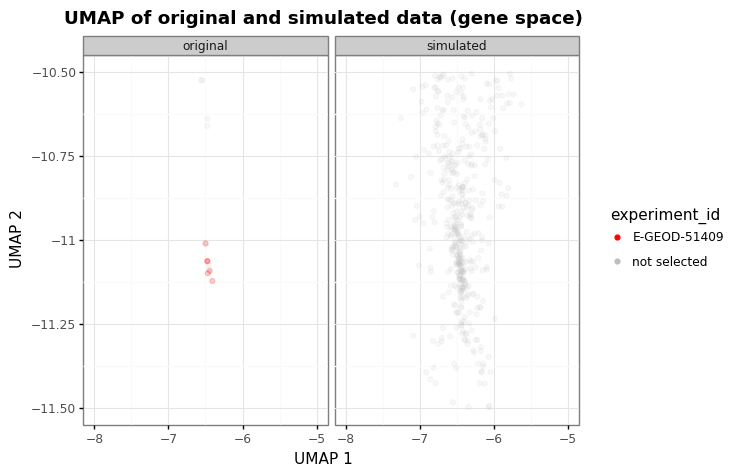

<ggplot: (8726625005702)>


In [28]:
# Add label for input or simulated dataset
input_data_UMAPencoded_df['dataset'] = 'original'
simulated_data_UMAPencoded_df['dataset'] = 'simulated'

# Concatenate input and simulated dataframes together
combined_data_df = pd.concat([input_data_UMAPencoded_df, simulated_data_UMAPencoded_df])

# Plot sequentially
#backgrd_data = combined_data_df[combined_data_df['experiment_id'] == 'Not selected']
#select_data = combined_data_df[combined_data_df['experiment_id'] != 'Not selected']

# Plot
fig = ggplot(combined_data_df, aes(x='1', y='2')) \
    + geom_point(aes(color='experiment_id'), alpha=0.1) \
    + facet_wrap('~dataset') \
    + labs(x ='UMAP 1',
           y = 'UMAP 2',
           title = 'UMAP of original and simulated data (gene space)') \
    + theme_bw() \
        + theme(
            legend_title_align = "center",
            plot_background=element_rect(fill='white'),
            legend_key=element_rect(fill='white', colour='white'), 
            plot_title=element_text(weight='bold')
        ) \
        + guides(colour=guide_legend(override_aes={'alpha': 1})) \
        + scale_color_manual(['red', '#bdbdbd']) \
        + geom_point(data=combined_data_df[combined_data_df['experiment_id'] == example_id],
                     alpha=0.1, 
                     color='red') \
    #+ xlim(-8,-5) \
    #+ ylim(-11.5,-10.5) \
        

print(fig)
ggsave(plot=fig, filename=experiment_simulated_file, dpi=500)